In [6]:
import tensorflow as tf

In [7]:
if tf.config.list_physical_devices('GPU'):
    print("GPU kullanılıyor.")
else:
    print("GPU kullanılmıyor.")

GPU kullanılıyor.


In [8]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [9]:
print(len(tf.config.list_physical_devices('GPU')))

2


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [12]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
print(train_images.shape)
print(len(train_labels))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 
(60000, 28, 28)
60000


In [13]:
network = Sequential()
network.add(Dense(512, activation="relu",input_shape=(28 * 28,)))
network.add(Dense(10, activation="softmax"))

network.compile(optimizer="rmsprop",
               loss="categorical_crossentropy",
               metrics=["accuracy"])

/home/dilaver/tf_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1738577333.327105    1153 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6634 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1738577333.331999    1153 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6634 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:02:00.0, compute capability: 6.1


In [14]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32")/255

In [15]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs = 5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)

print("Test_acc : ", test_acc)

Epoch 1/5


I0000 00:00:1738577335.447839    1301 service.cc:148] XLA service 0x7f8acc007ba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738577335.448208    1301 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
I0000 00:00:1738577335.448216    1301 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2025-02-03 13:08:55.482015: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738577335.555208    1301 cuda_dnn.cc:529] Loaded cuDNN version 90300


 53/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7279 - loss: 0.9617

I0000 00:00:1738577336.068799    1301 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8792 - loss: 0.4276
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9657 - loss: 0.1164
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9797 - loss: 0.0699
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0503
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9895 - loss: 0.0372
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9767 - loss: 0.0786    
Test_acc :  0.9799000024795532


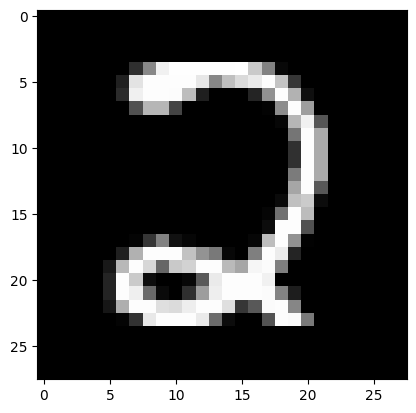

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Veri etiketi için tahmin: 2
Verinin Gerçek Etiketi :2


In [16]:
#(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

# Test verisinden bir örnek seçin
index = 72  # 0. test örneği
test_image = test_images[index]
test_image = test_image.reshape(28,28)

# test etiketini ilk haline getirin
test_labels_orj = np.argmax(test_labels, axis=1)
test_label = test_labels_orj[index]

# Görüntüyü görselleştirelim (isteğe bağlı)
plt.imshow(test_image, cmap="gray")
plt.show()

# Görüntüyü modelin beklediği şekle sokun
test_image = test_image.reshape(1, 28 * 28)  # (1, 784) şekline getiriyoruz
#test_image = test_image.astype("float32") / 255  # Normalizasyon

# Model ile tahmin yapın
predictions = network.predict(test_image)

# Tahminin hangi sınıfa ait olduğunu bulalım
predicted_label = np.argmax(predictions)

print(f"Veri etiketi için tahmin: {predicted_label}\nVerinin Gerçek Etiketi :{test_label}")

In [17]:
# modelimizi kaydedelim
network.save('mnist_model1.keras')


**WARNING**:You are saving your model as an HDF5 file via model.save() or keras.saving.save_model(model). This file format is considered legacy. We recommend using instead the native Keras format, e.g. model.save('my_model.keras') or keras.saving.save_model(model, 'my_model.keras').